<a href="https://colab.research.google.com/github/Aomaphisara/Project/blob/main/Quartile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 3: Re-CountSlope & Quartile/LabSlope.xlsx')
slope.head()

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes
0,2299,3640924,66.8,2016-11-11 09:40:06.053,87,NaN
1,2299,4020970,67.2,2017-03-31 10:18:54.363,140,0.002857
2,2299,4286612,69.2,2017-07-05 10:40:40.763,96,0.020833
3,2299,4546471,63.6,2017-10-03 09:19:54.710,89,-0.062921
4,2299,4801938,58.4,2018-01-04 09:03:28.847,92,-0.056522


In [3]:
slope.isnull().any()

PatientUID         False
PatientVisitUID    False
ResultValue        False
datetime           False
TimeDiff           False
Slopes              True
dtype: bool

In [7]:
slope.shape

(280099, 6)

In [4]:
slope[slope['Slopes'].isnull()] # only the fisrt row

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes
0,2299,3640924,66.8,2016-11-11 09:40:06.053,87,NaN


In [5]:
slope.columns

Index(['PatientUID', 'PatientVisitUID', 'ResultValue', 'datetime', 'TimeDiff',
       'Slopes'],
      dtype='object')

In [6]:
data = pd.DataFrame(slope)
data = data.dropna()
data

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes
1,2299,4020970,67.20,2017-03-31 10:18:54.363,140,0.002857
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.020833
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,-0.062921
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,-0.056522
5,2299,5051781,62.40,2018-03-29 09:10:51.133,84,0.047619
...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,-0.208313
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,0.168400
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,1.129412
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,0.035000


## **Slope**

> **ค่า x = ค่าจากวิสิท t ที่มาก่อน**




In [8]:
df = pd.DataFrame(data)

# Sort the DataFrame by PatientUID and PatientVisitUID
df = df.sort_values(by=['PatientUID', 'PatientVisitUID'])

# Create a new column to store the previous slope value
df['PreviousSlope'] = df['Slopes'].shift(1)

# Update the Slopes column with the PreviousSlope values
df['Slopes'] = df['PreviousSlope']

# Drop the PreviousSlope column
df = df.drop(columns=['PreviousSlope'])

In [12]:
slope = df.dropna()

In [13]:
slope

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.002857
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,0.020833
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,-0.062921
5,2299,5051781,62.40,2018-03-29 09:10:51.133,84,-0.056522
6,2299,5296557,55.00,2018-06-21 08:55:47.877,83,0.047619
...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,-0.655833
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,-0.208313
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,0.168400
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,1.129412


# **2**

In [14]:
import numpy as np

In [16]:
# Replace these with your actual quartile values
desired_Q1 = -1
desired_Q2 = 0
desired_Q3 = 1

# Create a function to categorize the slopes
def categorize_slope(s):
    if s <= desired_Q1:
        return 'Q1'
    elif desired_Q1 < s <= desired_Q2:
        return 'Q2'
    elif desired_Q2 < s <= desired_Q3:
        return 'Q3'
    else:
        return 'Q4'

# Apply the categorization function to create a new column
slope['SlopeCategory'] = slope['Slopes'].apply(categorize_slope)

<ipython-input-16-2a6c7a9bb680>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope['SlopeCategory'] = slope['Slopes'].apply(categorize_slope)


In [17]:
slope

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes,SlopeCategory
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.002857,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,0.020833,Q3
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,-0.062921,Q2
5,2299,5051781,62.40,2018-03-29 09:10:51.133,84,-0.056522,Q2
6,2299,5296557,55.00,2018-06-21 08:55:47.877,83,0.047619,Q3
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,-0.655833,Q2
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,-0.208313,Q2
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,0.168400,Q3
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,1.129412,Q4


## **check**

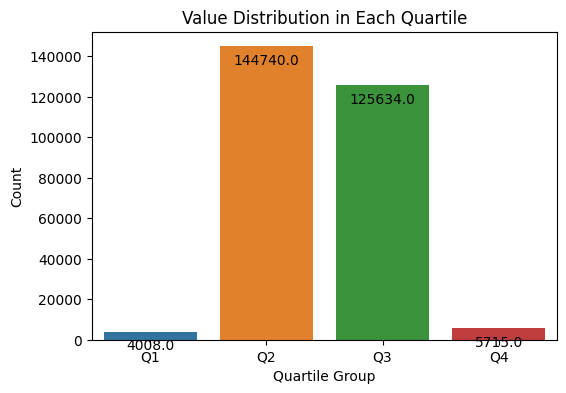

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

quartile_counts = slope['SlopeCategory'].value_counts()
desired_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Step 2: Create a bar plot to visualize the quartile distribution with actual counts on top of each bar
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=quartile_counts.index, y=quartile_counts.values, order=desired_order)
plt.xlabel('Quartile Group')
plt.ylabel('Count')
plt.title('Value Distribution in Each Quartile')

# Display the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -10), textcoords='offset points')
plt.show()

In [19]:
slope.groupby('SlopeCategory')['Slopes'].agg(['min', 'max'])

,min,max
SlopeCategory,,
Q1,-13.10000,-1.0
Q2,-1.00000,0.0
Q3,0.00002,1.0
Q4,1.00037,29.7


In [20]:
slope.groupby('SlopeCategory')['Slopes'].median()

SlopeCategory
Q1   -1.440909
Q2   -0.057619
Q3    0.066459
Q4    1.507692
Name: Slopes, dtype: float64

# **Excel**

In [21]:
quartile = slope[['PatientUID','PatientVisitUID','ResultValue','datetime','Slopes','TimeDiff','SlopeCategory']]
quartile

,PatientUID,PatientVisitUID,ResultValue,datetime,Slopes,TimeDiff,SlopeCategory
2,2299,4286612,69.20,2017-07-05 10:40:40.763,0.002857,96,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,0.020833,89,Q3
4,2299,4801938,58.40,2018-01-04 09:03:28.847,-0.062921,92,Q2
5,2299,5051781,62.40,2018-03-29 09:10:51.133,-0.056522,84,Q2
6,2299,5296557,55.00,2018-06-21 08:55:47.877,0.047619,83,Q3
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,-0.655833,83,Q2
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,-0.208313,25,Q2
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,0.168400,17,Q3
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,1.129412,28,Q4


In [22]:
quartile.to_excel("/content/drive/MyDrive/Quartile.xlsx", index=False)